## Step 1:

Import Basic Scikit Learn Libraries for Data Manipulation as well Data Visulization.

In [1]:

# Import Data Manipulation Libraries
import numpy as np
import pandas as pd

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Logging  Files
import logging

logging.basicConfig(
    level=logging.INFO,
    filemode='w',
    filename='model.log',
    format='%(asctime)s - %(levelname)s - %(message)s')

In [2]:
# Load Dataset
url = 'https://raw.githubusercontent.com/MontyVasita18/CementCompositeStrength_PredictionModel/refs/heads/main/concrete_data.csv'

df=pd.read_csv(url)

df.sample(frac=1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
319,249.1,0.0,98.8,158.1,12.8,987.8,889.0,3,15.36
270,231.8,0.0,121.6,174.0,6.7,1056.4,778.5,14,26.77
625,307.0,0.0,0.0,193.0,0.0,968.0,812.0,90,32.92
527,359.0,19.0,141.0,154.0,10.9,942.0,801.0,7,35.75
140,313.3,262.2,0.0,175.5,8.6,1046.9,611.8,56,64.90
...,...,...,...,...,...,...,...,...,...
55,198.6,132.4,0.0,192.0,0.0,978.4,825.5,7,14.64
687,236.0,157.0,0.0,192.0,0.0,972.6,749.1,90,47.78
148,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.80
982,312.7,0.0,0.0,178.1,8.0,999.7,822.2,28,25.10



## Step 3:

Doing Exploratory Data Analysis [EDA]:--->

1. Univariate Analysis

2. Bi Variate Analysis

In [3]:
# Performing Univariate Analysis
from collections import OrderedDict

stats=[]

for i in df.columns:
    numerical_stats= OrderedDict({
        'feature':i,
        'type':df[i].dtype,
        'null_values':df[i].isnull().sum(),
        'unique_values':df[i].nunique(),
        'mode':df[i].mode()[0],
        'mean':df[i].mean(),
        'std_deviation':df[i].std(),
        'min_value':df[i].min(),
        'max_value':df[i].max(),
        'range':df[i].max() - df[i].min(),
        'skewness':df[i].skew(),
        'kurtosis':df[i].kurtosis(),
        'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
    })
    stats.append(numerical_stats)

df_stats=pd.DataFrame(stats)


df_stats

,feature,type,null_values,unique_values,mode,mean,std_deviation,min_value,max_value,range,skewness,kurtosis,IQR
0,cement,float64,0,278,362.6,281.167864,104.506364,102.00,540.0,438.00,0.509481,-0.520652,157.625
1,blast_furnace_slag,float64,0,185,0.0,73.895825,86.279342,0.00,359.4,359.40,0.800717,-0.508175,142.950
2,fly_ash,float64,0,156,0.0,54.188350,63.997004,0.00,200.1,200.10,0.537354,-1.328746,118.300
3,water,float64,0,195,192.0,181.567282,21.354219,121.80,247.0,125.20,0.074628,0.122082,27.100
4,superplasticizer,float64,0,111,0.0,6.204660,5.973841,0.00,32.2,32.20,0.907203,1.411269,10.200
5,coarse_aggregate,float64,0,284,932.0,972.918932,77.753954,801.00,1145.0,344.00,-0.040220,-0.599016,97.400
6,fine_aggregate,float64,0,302,594.0,773.580485,80.175980,594.00,992.6,398.60,-0.253010,-0.102177,93.050
7,age,int64,0,14,28.0,45.662136,63.169912,1.00,365.0,364.00,3.269177,12.168989,49.000
8,concrete_compressive_strength,float64,0,845,33.4,35.817961,16.705742,2.33,82.6,80.27,0.416977,-0.313725,22.425


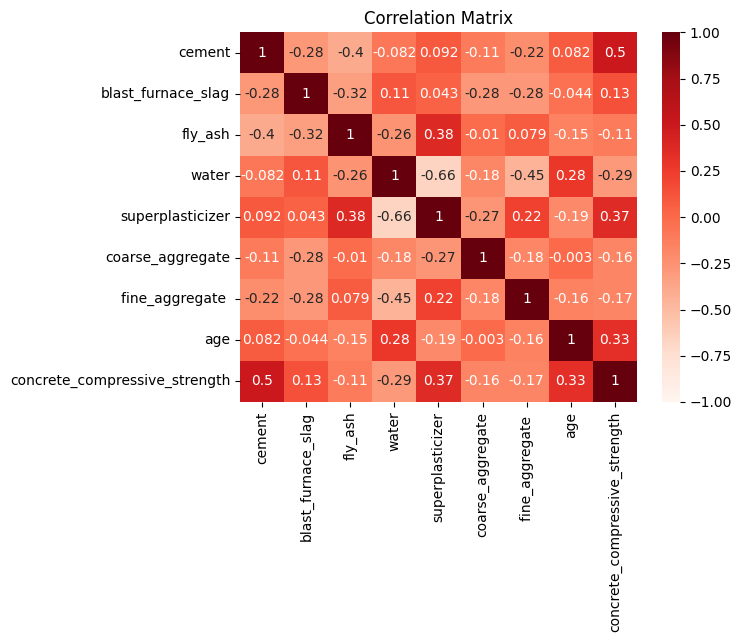

In [4]:
# Checking Correlation Matrix
# X = Independent Variables
# y = Dependent Variable ------->['Concrete_compressive_strength']
sns.heatmap(df.corr(),annot=True,yticklabels=True,vmax=1,center=0,vmin=-1, cmap='Reds')
plt.title('Correlation Matrix')
plt.show()


In [5]:
# Understanding Feature and Create New Features Based on Correlation
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Name: concrete_compressive_strength, dtype: float64

In [9]:
df['Composite_Ratio'] = (df['cement'] + df['superplasticizer'] + df['blast_furnace_slag'])/(df['water'])

In [13]:
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Composite_Ratio                  0.620196
Name: concrete_compressive_strength, dtype: float64

In [16]:
df['cement_to_water_ratio'] = df['cement']/df['water']

In [19]:
df.drop('cement_water_ratio',axis=1, inplace=True)

In [20]:
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Composite_Ratio                  0.620196
cement_to_water_ratio            0.559522
Name: concrete_compressive_strength, dtype: float64

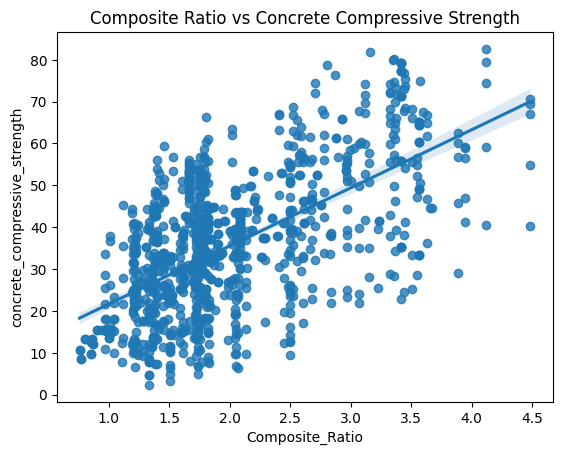

In [23]:
sns.regplot(x=df['Composite_Ratio'], y=df['concrete_compressive_strength'])
plt.title('Composite Ratio vs Concrete Compressive Strength')

plt.show()

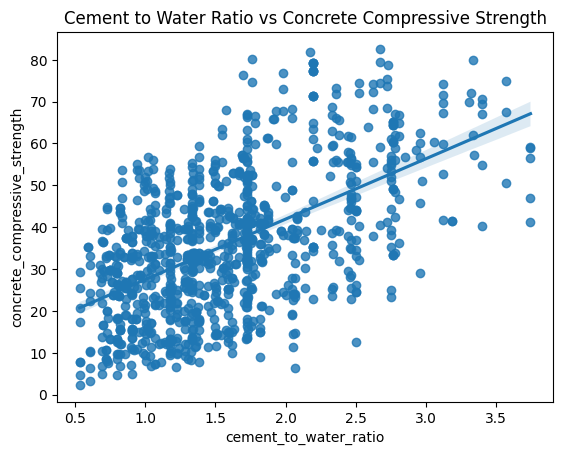

In [25]:
sns.regplot(x=df['cement_to_water_ratio'],y=df['concrete_compressive_strength'])
plt.title('Cement to Water Ratio vs Concrete Compressive Strength')
plt.show()

## Step 5:

1. Split Data into Independent and Dependent Column i.e X and y

2. Using Train and Test Split to Prevent Data leakage

In [30]:
from sklearn.model_selection import train_test_split

X=df.drop(columns='concrete_compressive_strength')

y=df['concrete_compressive_strength']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [31]:
# Using Scaling Technique

from sklearn.preprocessing import MinMaxScaler

scalar=MinMaxScaler()
X_train=scalar.fit_transform(X_train)

X_test=scalar.transform(X_test)



In [34]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train,y_train)

y_pred_LR=LR.predict(X_test)


from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

r2_score_LR=r2_score(y_test,y_pred_LR)
r2_score_LR

0.5941935306287762